Part 1 - Data Mining Techniques

Team Members:
- Gerasimos Bekos
- Dimitrios Stefanos Porichis

## Data Cleaning

Records with NaN values in critical fields (e.g. beds, description) are discarded

#### Data Cleaning 2019

In [ ]:
import pandas as pd

april19 = pd.read_csv('data/2019/april/listings.csv')
febr19 = pd.read_csv('data/2019/febrouary/listings.csv')
march19 = pd.read_csv('data/2019/march/listings.csv')

febr19 = febr19[['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description',  'city', 'cancellation_policy', 'bed_type', 'bathrooms',
               'accommodates', 'amenities', 'room_type', 'property_type', 'price',
               'availability_365', 'minimum_nights']]

febr19.insert(loc=1, column='month', value='february')

march19 = march19[['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description',  'city', 'cancellation_policy', 'bed_type', 'bathrooms',
               'accommodates', 'amenities', 'room_type', 'property_type', 'price',
               'availability_365', 'minimum_nights']]

march19.insert(loc=1, column='month', value='march')


april19 = april19[['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description',  'city', 'cancellation_policy', 'bed_type', 'bathrooms',
               'accommodates', 'amenities', 'room_type', 'property_type', 'price',
               'availability_365', 'minimum_nights']]

april19.insert(loc=1, column='month', value='april')

all19 = pd.concat([febr19,march19,april19])

# Converting the price to a number instead of a string
def clean_and_convert_price(price_str):
    price_cleaned = ''.join(filter(str.isdigit, price_str))
    return float( int(price_cleaned)/100)

all19['price'] = all19['price'].apply(clean_and_convert_price)



print("\nSize of DataFrame before deletion:")
print(all19.shape)

####################
# NaN Report Card
####################

nan_counts = {}
for column in all19.columns:
    nan_counts[column] = all19[column].isna().sum()

# Print the NaN counts for each column
for column, count in nan_counts.items():
    print(f"NaN count in column '{column}': {count}")

####################


# Deleting entries with NaN in critical fields
all19 = all19.dropna(subset=['beds', 'bedrooms', 'description', 'city'])

# Changing the NaN values in non critical fields
all19["neighbourhood"] = all19["neighbourhood"].fillna("Not Specified")

print("\nSize of DataFrame after deletion:")
print(all19.shape)  # shape attribute returns a tuple (number of rows, number of columns)


# Getting the last review from review.csv (As requested in eclass)

# Load all the reviews
comapril19 = pd.read_csv('data/2019/april/reviews.csv')
comfebr19 = pd.read_csv('data/2019/febrouary/reviews.csv')
commarch19 = pd.read_csv('data/2019/march/reviews.csv')

# Order them by date from newest to oldest
comfebr19 = comfebr19.sort_values(by='date', ascending=False)
commarch19 = commarch19.sort_values(by='date', ascending=False)
comapril19 = comapril19.sort_values(by='date', ascending=False)


# Keep only the first instance of an ID
comfebr19 = comfebr19.groupby('listing_id').first().reset_index()
commarch19 = commarch19.groupby('listing_id').first().reset_index()
comapril19 = comapril19.groupby('listing_id').first().reset_index()

# Put them together
allcomments = pd.concat([comapril19,comfebr19,commarch19])

# And do the same between the max of each table
allcomments = allcomments.sort_values(by='date', ascending=False)
allcomments = allcomments.groupby('listing_id').first().reset_index()

# Keep only the id and the comments

allcomments = allcomments[['listing_id', 'comments']]
allcomments.rename(columns={'listing_id': 'id'}, inplace=True)

allcomments = allcomments[allcomments['id'].isin(all19['id'])]


# Now allcomments has only the latest commend of each listing_id
# Lets append it to our all19 dataframe
all19 = pd.merge(all19, allcomments, on='id', how='left')
all19['comments'] = all19['comments'].fillna("NOCOMMENT")




print("\nSize of DataFrame after deletion:")
print(all19.shape)

####################
# NaN Report Card
####################

nan_counts = {}
for column in all19.columns:
    nan_counts[column] = all19[column].isna().sum()

# Print the NaN counts for each column
for column, count in nan_counts.items():
    print(f"NaN count in column '{column}': {count}")

####################

all19 = all19.sort_values(by='beds', ascending=False)
# Notes: There is a room with 24 beds and no bedrooms, erase it...

all19 = all19.sort_values(by='bathrooms', ascending=False)
# Notes: Ok max was 10 bathrooms, nothing crazy

all19 = all19.sort_values(by='bedrooms', ascending=False)
# Notes: Ok max was 14 bedrooms, nothing crazy

all19 = all19.sort_values(by='price', ascending=False)
# Notes: Pending notes

all19 = all19.sort_values(by='id', ascending=False)
# Notes: Pending notes

all19.to_csv('data/train_2019.csv', index=False)



#### Data Cleaning 2023


In [ ]:
import pandas as pd
import re

march23 = pd.read_csv('data/2023/march/listings.csv')
june23 = pd.read_csv('data/2023/june/listings.csv')
sept23 = pd.read_csv('data/2023/september/listings.csv')


march23 = march23[['id', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description', 'bathrooms', 'accommodates', 'amenities', 'room_type',
               'property_type', 'price','availability_365', 'minimum_nights', 'bathrooms_text']]

march23.insert(loc=1, column='month', value='march')


june23 = june23[['id', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description', 'bathrooms', 'accommodates', 'amenities', 'room_type',
               'property_type', 'price','availability_365', 'minimum_nights', 'bathrooms_text']]

june23.insert(loc=1, column='month', value='june')

sept23 = sept23[['id', 'bedrooms', 'beds', 'review_scores_rating',
               'number_of_reviews', 'neighbourhood', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
               'last_review', 'instant_bookable', 'host_id', 'host_since', 'host_response_rate',
               'host_identity_verified', 'host_has_profile_pic', 'first_review',
               'description', 'bathrooms', 'accommodates', 'amenities', 'room_type',
               'property_type', 'price','availability_365', 'minimum_nights', 'bathrooms_text']]

sept23.insert(loc=1, column='month', value='september')

all23 = pd.concat([march23,june23,sept23])


# Converting the price to a number instead of a string

def clean_and_convert_price(price_str):
    # Remove non-numeric characters from the string
    price_cleaned = ''.join(filter(str.isdigit, price_str))
    # Convert the cleaned string to an integer
    return float( int(price_cleaned)/100)

# Apply the function to the 'Price' column
all23['price'] = all23['price'].apply(clean_and_convert_price)

# Bathrooms are a mess in this dataset, extracting the value from string bathroomtext
# and saving it in the bathroom column

def extract_bathrooms(bathroom_str):
  if(bathroom_str == "Half-bath"):
    return 0.5
  clean_bath = re.sub(r'[^\d.]', '', bathroom_str)
  if(clean_bath == ''):
    return 0
  return float(clean_bath)

all23['bathrooms'] = all23['bathrooms_text'].astype(str).apply(extract_bathrooms)

def deuppercase_neighbourhood(string):
  return str(string).lower().title()

all23['neighbourhood_cleansed'] = all23['neighbourhood_cleansed'].apply(deuppercase_neighbourhood)

nan_counts = {}
for column in all23.columns:
    nan_counts[column] = all23[column].isna().sum()

# Print the NaN counts for each column
for column, count in nan_counts.items():
    print(f"NaN count in column '{column}': {count}")

print("\nSize of DataFrame before deletion:")
print(all23.shape)  # shape attribute returns a tuple (number of rows, number of columns)

# Deleting entries with NaN in critical fields
all23 = all23.dropna(subset=['beds', 'bedrooms', 'description'])

# Changing the NaN values in non critical fields
all23["neighbourhood"] = all23["neighbourhood"].fillna("Not Specified")


# Getting the last review from review.csv (As requested in eclass)

#march23,june23,sept23

# Load all the reviews
commarch23 = pd.read_csv('data/2023/march/reviews.csv')
comjune23 = pd.read_csv('data/2023/june/reviews.csv')
comsept23 = pd.read_csv('data/2023/september/reviews.csv')

# Order them by date from newest to oldest
commarch23 = commarch23.sort_values(by='date', ascending=False)
comjune23 = comjune23.sort_values(by='date', ascending=False)
comsept23 = comsept23.sort_values(by='date', ascending=False)


# Keep only the first instance of an ID
commarch23 = commarch23.groupby('listing_id').first().reset_index()
comjune23 = comjune23.groupby('listing_id').first().reset_index()
comsept23 = comsept23.groupby('listing_id').first().reset_index()

# Put them together
allcomments = pd.concat([commarch23,comjune23,comsept23])

# And do the same between the max of each table
allcomments = allcomments.sort_values(by='date', ascending=False)
allcomments = allcomments.groupby('listing_id').first().reset_index()

# Keep only the id and the comments

allcomments = allcomments[['listing_id', 'comments']]
allcomments.rename(columns={'listing_id': 'id'}, inplace=True)

allcomments = allcomments[allcomments['id'].isin(all23['id'])]


# Now allcomments has only the latest commend of each listing_id
# Lets append it to our all19 dataframe
all23 = pd.merge(all23, allcomments, on='id', how='left');
all23['comments'] = all23['comments'].fillna("NOCOMMENT")


print("\nSize of DataFrame after deletion:")
print(all23.shape)  # shape attribute returns a tuple (number of rows, number of columns)

nan_counts = {}
for column in all23.columns:
    nan_counts[column] = all23[column].isna().sum()

# Print the NaN counts for each column
for column, count in nan_counts.items():
    print(f"NaN count in column '{column}': {count}")


all23 = all23.sort_values(by='beds', ascending=False)
# Notes: There is a room with 40 beds but it states that it has it in the discription
# I will let it slide

all23 = all23.sort_values(by='bathrooms', ascending=False)
# Notes: No bathroom info... All returned NaN

all23 = all23.sort_values(by='bedrooms', ascending=False)
# Notes: Ok max was 14 bedrooms, nothing crazy

all23 = all23.sort_values(by='price', ascending=False)
# Notes: Pending notes

all23.to_csv('data/train_2023.csv', index=False)


## Question 1: Data Exploration

#### 1.1 What is the most frequent room_type in your dataset?

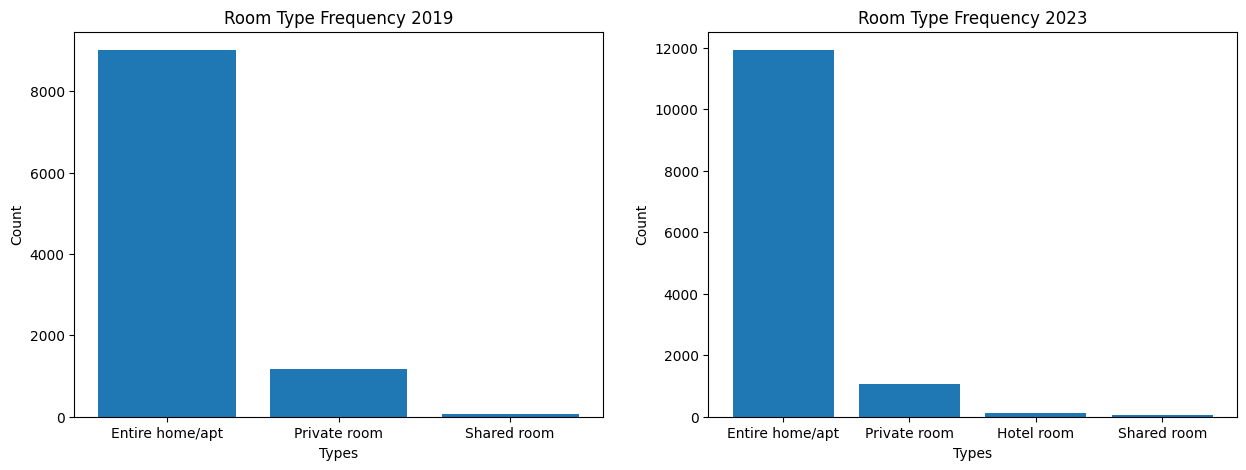

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(1,2, figsize=(15,5))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
# Prevent duplicate listings because of multiple months
all19 = all19.groupby('id').first()

types_count = all19["room_type"].value_counts()
types = pd.DataFrame(types_count)


f1.bar(list(types.index), list(types['count']))
f1.set_xlabel('Types')
f1.set_ylabel('Count')
f1.set_title('Room Type Frequency 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
# Prevent duplicate listings because of multiple months
all23 = all23.groupby('id').first()

types_count = all23["room_type"].value_counts()
types = pd.DataFrame(types_count)


f2.bar(list(types.index), list(types['count']))
f2.set_xlabel('Types')
f2.set_ylabel('Count')
f2.set_title('Room Type Frequency 2023')

plt.show()




#### 1.2 Create a chart (or charts) showing the trend of prices over the 3-month period.

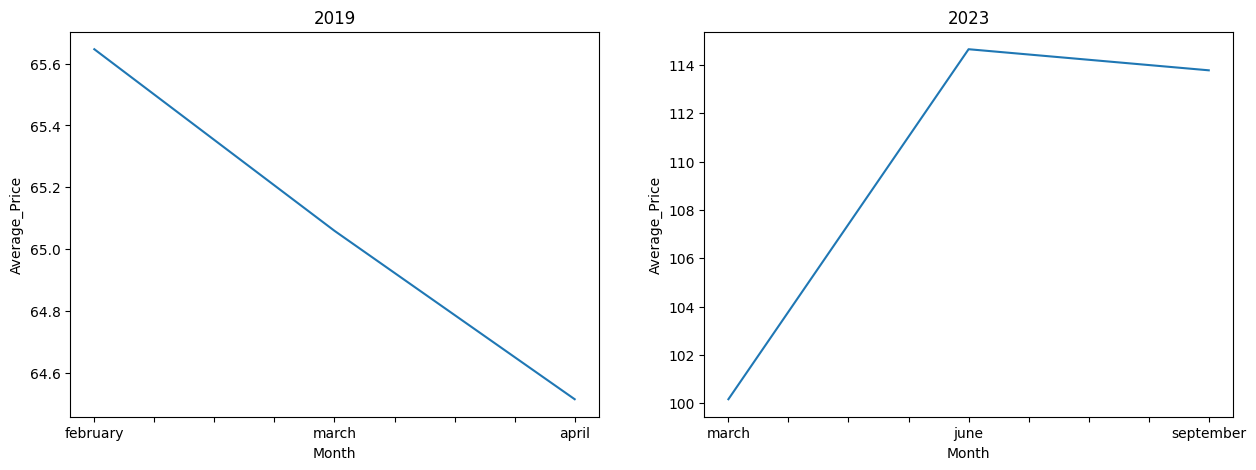

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15,5))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')

prices19 = all19[['month','price']]
results19 = prices19.groupby(['month'])['price'].mean()

# Make them appear in the right order
desired_order = ['february', 'march', 'april']
results19 = results19.reindex(desired_order)

ax = results19.plot(ax=axes[0], title="2019")
ax.set_xlabel('Month')
ax.set_ylabel('Average_Price')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')

prices23 = all23[['month','price']]
results23 = prices23.groupby(['month'])['price'].mean()

# Make them appear in the right order
desired_order = ['march', 'june', 'september']
results23 = results23.reindex(desired_order)

ax = results23.plot(ax=axes[1], title="2023")
ax.set_xlabel('Month')
ax.set_ylabel('Average_Price')

plt.show()


#### 1.3 Which are the top 5 neighborhoods with the most reviews?

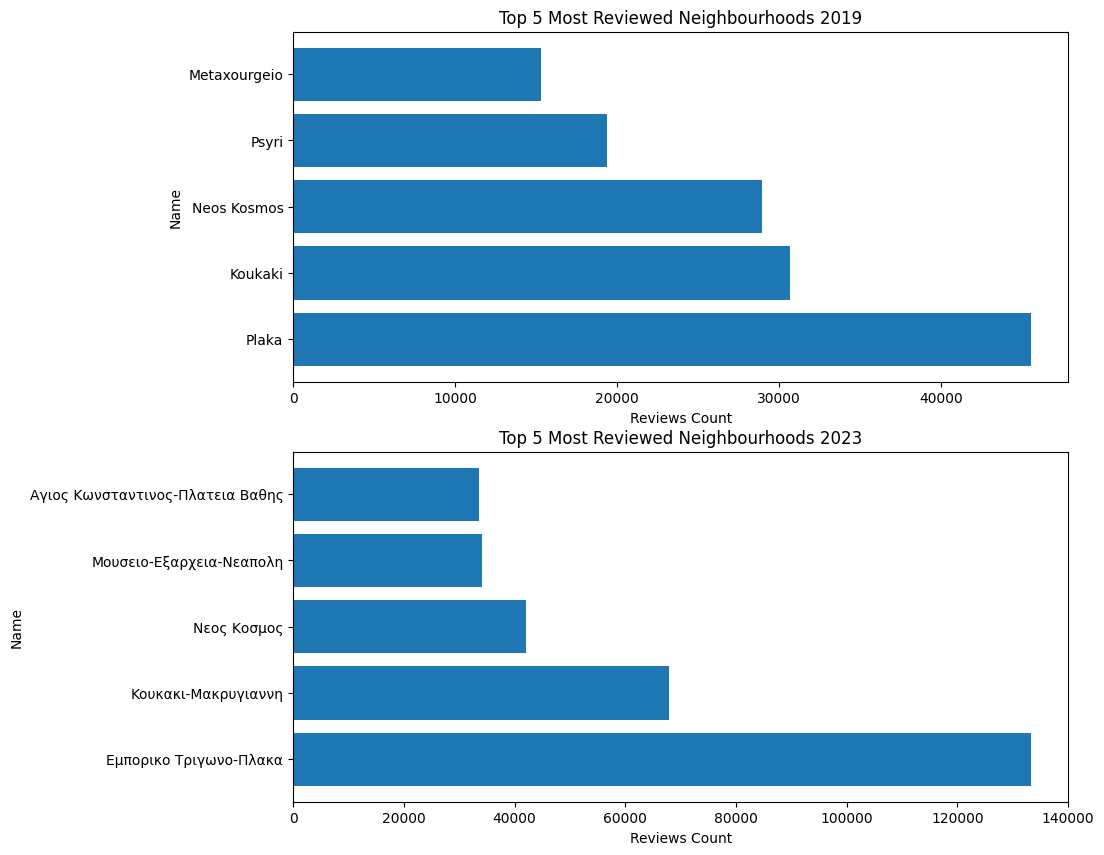

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(2,1, figsize=(10,10))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
# Prevent duplicate listings because of multiple months (this commend will not appear again, you got the point)
all19 = all19.groupby('id').first()

all19 = all19.groupby('neighbourhood').sum()
review_count = all19[['number_of_reviews']] # keep only the summed reviews

review_count = review_count.sort_values(by='number_of_reviews', ascending=False)
review_count = review_count.head(5) # Top 5

f1.barh(list(review_count.index), list(review_count['number_of_reviews']))
f1.set_xlabel('Reviews Count')
f1.set_ylabel('Name')
f1.set_title('Top 5 Most Reviewed Neighbourhoods 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23.groupby('id').first()

all23 = all23.groupby('neighbourhood_cleansed').sum()
review_count = all23[['number_of_reviews']] # keep only the summed reviews

review_count = review_count.sort_values(by='number_of_reviews', ascending=False)
review_count = review_count.head(5) # Top 5

f2.barh(list(review_count.index), list(review_count['number_of_reviews']))
f2.set_xlabel('Reviews Count')
f2.set_ylabel('Name')
f2.set_title('Top 5 Most Reviewed Neighbourhoods 2023')
plt.show()


#### 1.4 Which neighborhood has the most property listings?

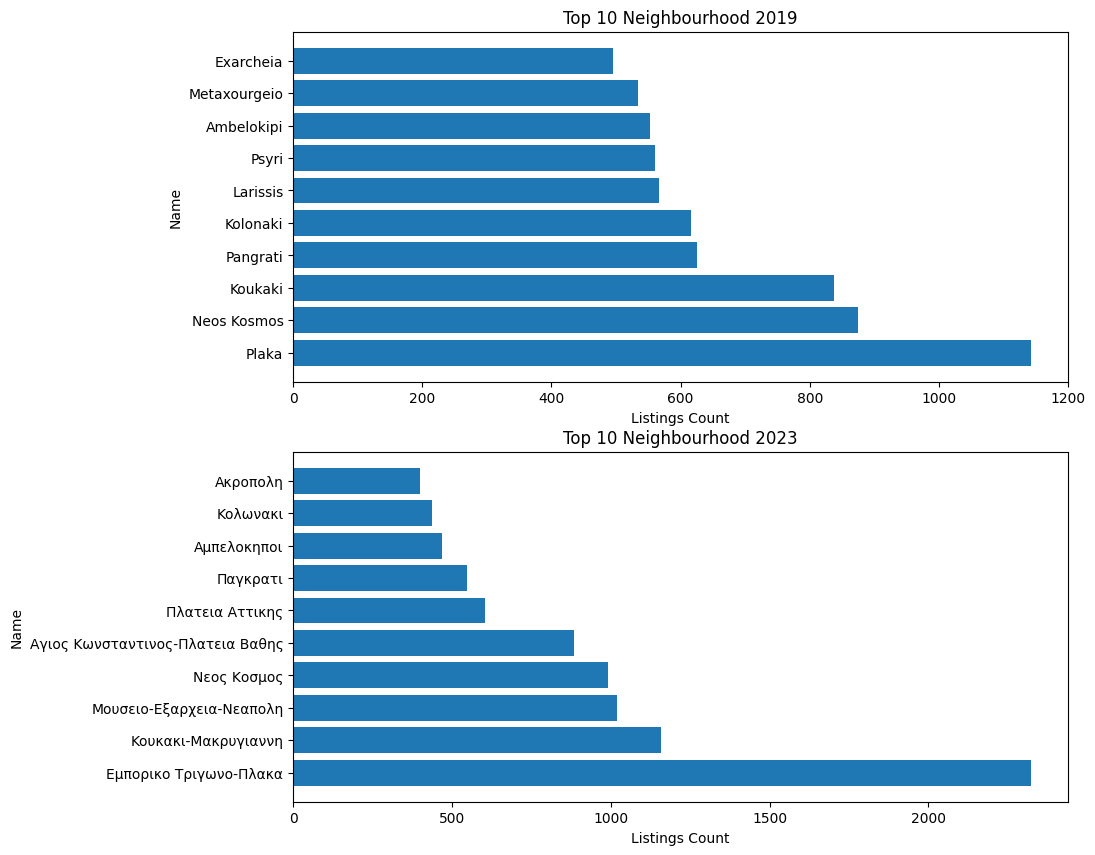

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(2,1, figsize=(10,10))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19.groupby('id').first()

types_count = all19["neighbourhood"].value_counts()
types = pd.DataFrame(types_count)

types = types.sort_values(by='count', ascending=False).head(10)

f1.barh(list(types.index), list(types['count']))
f1.set_xlabel('Listings Count')
f1.set_ylabel('Name')
f1.set_title('Top 10 Neighbourhood 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23.groupby('id').first()

types_count = all23["neighbourhood_cleansed"].value_counts()
types = pd.DataFrame(types_count)

types = types.sort_values(by='count', ascending=False).head(10)

f2.barh(list(types.index), list(types['count']))
f2.set_xlabel('Listings Count')
f2.set_ylabel('Name')
f2.set_title('Top 10 Neighbourhood 2023')
plt.show()

Η Πλάκα είναι η γειτονία με τις περισσότερες καταχωρήσεις και στις 2 χρονίες

#### 1.5 How many listings are there per neighborhood and per month?


Size of DataFrame after deletion:
(44, 1)


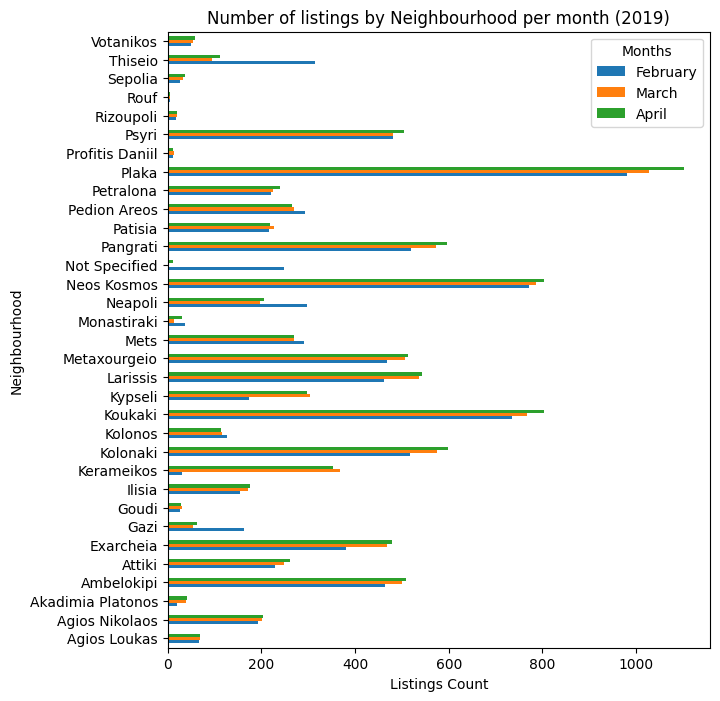

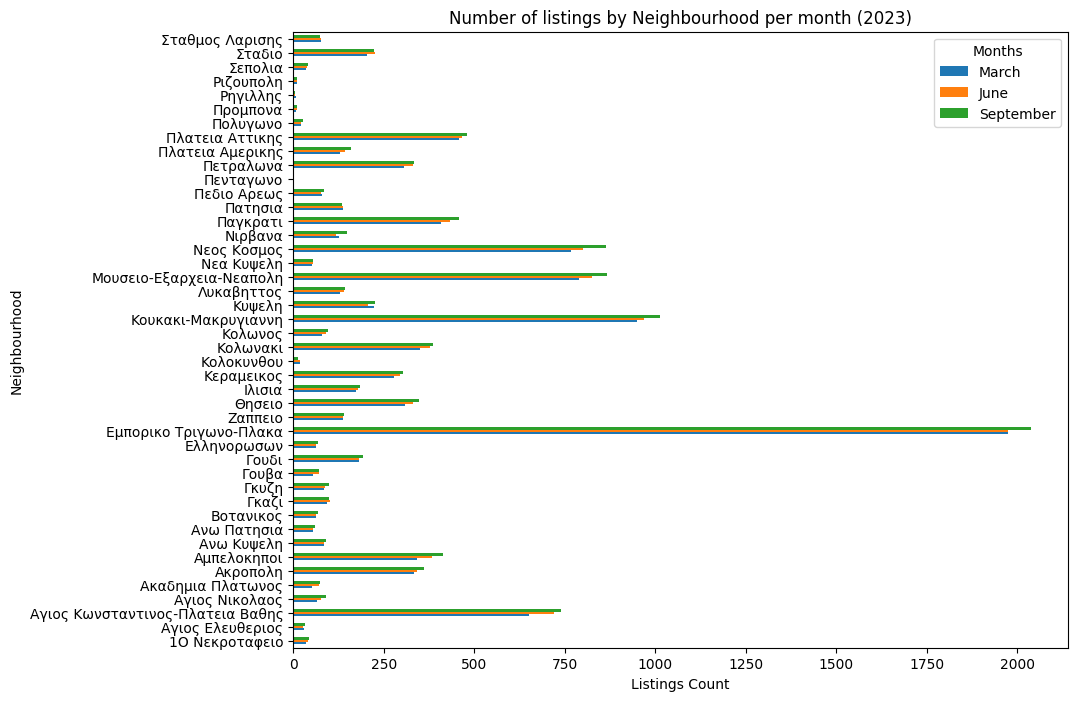

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')

febr19 = all19[all19['month'] == 'february']
march19 = all19[all19['month'] == 'march']
april19 = all19[all19['month'] == 'april']

# Calculating the unique ids for each month seperetly

febr19 = febr19.groupby('neighbourhood').count()
febr19 = febr19[['id']]
febr19.sort_values(by='id', ascending=False)

febr19.rename(columns={'id': 'February'}, inplace=True)

march19 = march19.groupby('neighbourhood').count()
march19 = march19[['id']]
march19.sort_values(by='id', ascending=False)

march19.rename(columns={'id': 'March'}, inplace=True)

april19 = april19.groupby('neighbourhood').count()
april19 = april19[['id']]
april19.sort_values(by='id', ascending=False)

april19.rename(columns={'id': 'April'}, inplace=True)

# Merging the data

all = pd.merge(febr19, march19, left_index=True, right_index=True)
all = pd.merge(all, april19, left_index=True, right_index=True)

f1 = all.plot(kind='barh', figsize=(7,8), rot=0)

# Adding labels and title
f1.set_xlabel('Listings Count')
f1.set_ylabel('Neighbourhood')
f1.set_title('Number of listings by Neighbourhood per month (2019)')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')

march23 = all23[all23['month'] == 'march']
june23 = all23[all23['month'] == 'june']
sept23 = all23[all23['month'] == 'september']

# Calculating the unique ids for each month seperetly

march23 = march23.groupby('neighbourhood_cleansed').count()
march23 = march23[['id']]
march23.sort_values(by='id', ascending=False)

march23.rename(columns={'id': 'March'}, inplace=True)

june23 = june23.groupby('neighbourhood_cleansed').count()
june23 = june23[['id']]
june23.sort_values(by='id', ascending=False)

june23.rename(columns={'id': 'June'}, inplace=True)

print("\nSize of DataFrame after deletion:")
print(june23.shape)

sept23 = sept23.groupby('neighbourhood_cleansed').count()
sept23 = sept23[['id']]
sept23.sort_values(by='id', ascending=False)

sept23.rename(columns={'id': 'September'}, inplace=True)

# Merging the data

all = pd.merge(march23, june23, left_index=True, right_index=True)
all = pd.merge(all, sept23, left_index=True, right_index=True)

f2 = all.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f2.set_xlabel('Listings Count')
f2.set_ylabel('Neighbourhood')
f2.set_title('Number of listings by Neighbourhood per month (2023)')

# Show plot

f1.legend(title='Months')
f2.legend(title='Months')

plt.show()


#### 1.7 What is the most frequent room_type in each neighborhood?

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19.groupby('id').first()

# Count different types
all19 = all19.groupby('neighbourhood')['room_type'].value_counts()
all19 = all19.reset_index(name='count')

# Select the maximum
max_rows = all19.groupby('neighbourhood')['count'].idxmax()
result = all19.loc[max_rows]

result.rename(columns={'neighbourhood': 'neighbourhood'}, inplace=True)
result.rename(columns={'room_type': 'most_frequent_room_type'}, inplace=True)

display(result.style.hide())

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23.groupby('id').first()

all23 = all23.groupby('neighbourhood_cleansed')['room_type'].value_counts()

all23 = all23.reset_index(name='count')

max_rows = all23.groupby('neighbourhood_cleansed')['count'].idxmax()
result = all23.loc[max_rows]
result.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)
result.rename(columns={'room_type': 'most_frequent_room_type'}, inplace=True)

display(result.style.hide())

## PRINT AS A TABLE


Σε όλες τις περιοχές ο πιο συχνός τύπος είναι Entire home/apt

#### 1.8 Which is the most expensive room_type?

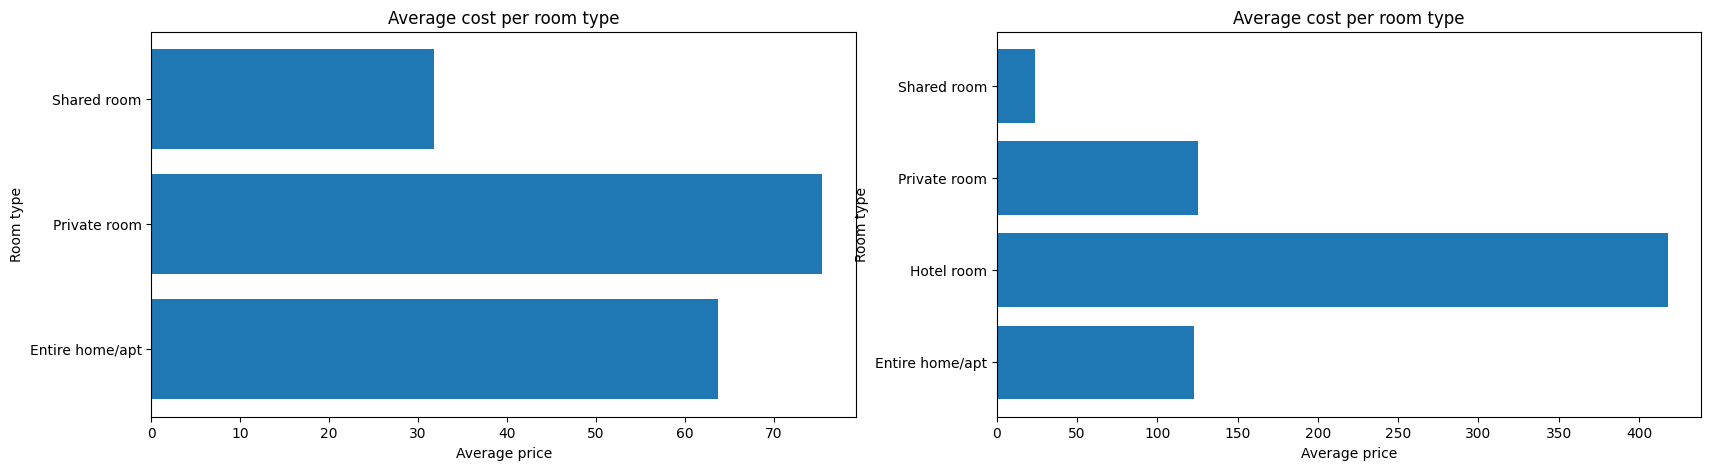

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(1,2, figsize=(20,5))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[['id','room_type', 'price']].groupby('id').first()

types = all19.groupby('room_type')['price'].mean()
results19 = pd.DataFrame(types)
results19.rename(columns={'price': 'average_price'}, inplace=True)

f1.barh(list(results19.index), list(results19['average_price']))
f1.set_xlabel('Average price')
f1.set_ylabel('Room type')
f1.set_title('Average cost per room type')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23[['id','room_type', 'price']].groupby('id').first()

types = all23.groupby('room_type')['price'].mean()
results23 = pd.DataFrame(types)
results23.rename(columns={'price': 'average_price'}, inplace=True)

f2.barh(list(results23.index), list(results23['average_price']))
f2.set_xlabel('Average price')
f2.set_ylabel('Room type')
f2.set_title('Average cost per room type')

plt.show()

#### 1.9 Use the Folium Map library with the latitude/longitude columns and display on a map, for one month of your choice, the available properties.

In [14]:
import pandas as pd
import folium

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[all19['month'] == 'march']

random_sample = all19.sample(n=700, random_state=17)
random_sample = random_sample[['room_type', 'beds','latitude', 'longitude']]

AthensMap = folium.Map(location=[37.975512, 23.734874], zoom_start=13)

for index, row in random_sample.iterrows():
    popup_content = f"<br><b>room_type:</b> {row['room_type']}<br><b>beds:</b> {row['beds']}"

    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_content).add_to(AthensMap)

print("Athens map 2019 (700 listings sample)")
display(AthensMap)


##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23[all23['month'] == 'march']

random_sample = all23.sample(n=700, random_state=17)
random_sample = random_sample[['room_type', 'beds','latitude', 'longitude']]


AthensMap = folium.Map(location=[37.975512, 23.734874], zoom_start=13)

for index, row in random_sample.iterrows():
    popup_content = f"<b>room_type:</b> {row['room_type']}<br><b>beds:</b> {row['beds']}"

    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_content).add_to(AthensMap)

print("Athens map 2023 (700 listings sample)")
display(AthensMap)

Athens map 2019 (700 listings sample)


Athens map 2023 (700 listings sample)


#### 1.10 Create different word clouds using data from the columns neighbourhood, transit, description, and last_review.

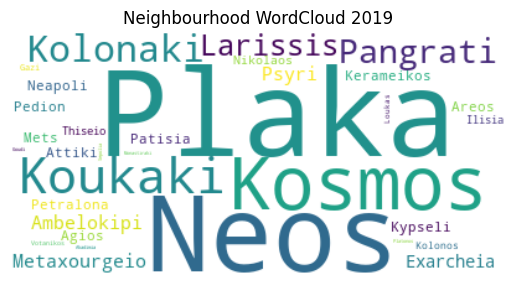

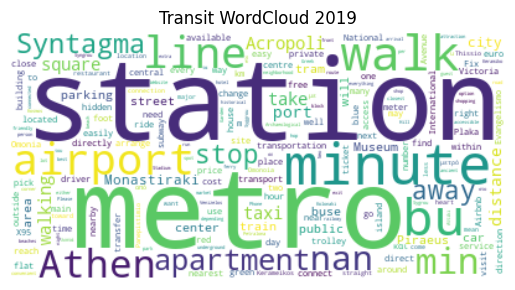

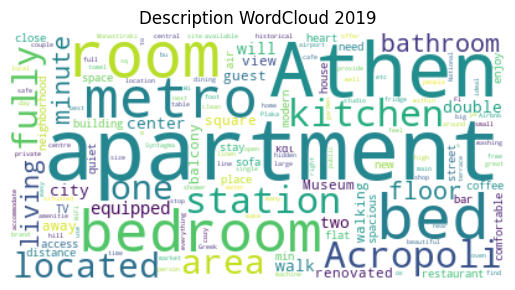

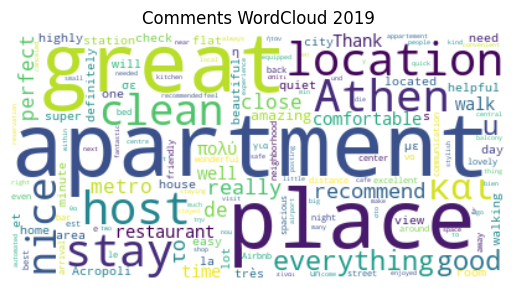

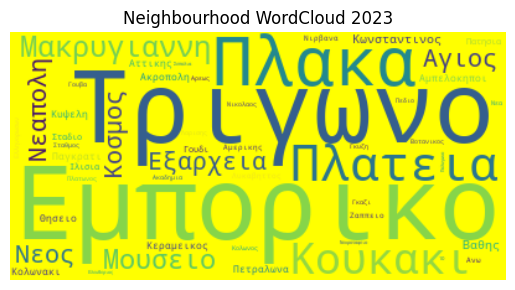

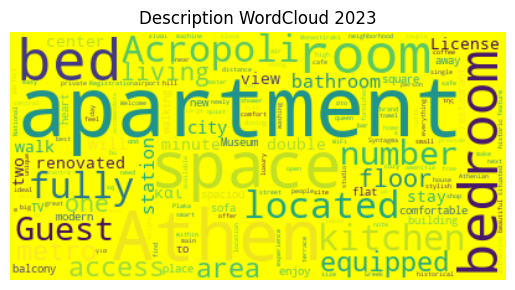

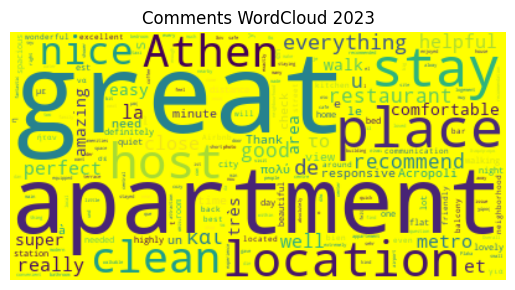

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Notes: A better text cleaning is needed, (transit, comments...)

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')

neighbourhood19 = pd.DataFrame(all19['neighbourhood'])
transit19 = pd.DataFrame(all19['transit'].astype(str))
description19 = pd.DataFrame(all19['description'])
comments19 = pd.DataFrame(all19['comments'])

### Neighbourhood WordCloud ###
n_text = " ".join(neighbourhood for neighbourhood in neighbourhood19.neighbourhood)

stopwords = set(STOPWORDS)
stopwords.update(["Not", "Specified", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(n_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neighbourhood WordCloud 2019")
plt.show()

### Transit WordCloud ###
t_text = " ".join(transit for transit in transit19.transit)

stopwords = set(STOPWORDS)
stopwords.update(["Not", "Specified", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(t_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Transit WordCloud 2019")
plt.show()

### Description WordCloud ###
d_text = " ".join(description for description in description19.description)

stopwords = set(STOPWORDS)
stopwords.update(["Not", "Specified", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(d_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Description WordCloud 2019")
plt.show()

### Comments WordCloud ###
c_text = " ".join(comments for comments in comments19.comments)

stopwords = set(STOPWORDS)
stopwords.update(["NOCOMMENT", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(c_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments WordCloud 2019")
plt.show()

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')

neighbourhood23 = pd.DataFrame(all23['neighbourhood_cleansed'].astype(str))
description23 = pd.DataFrame(all23['description'].astype(str))
comments23 = pd.DataFrame(all23['comments'].astype(str))

### Neighbourhood WordCloud ###
n_text = " ".join(neighbourhood for neighbourhood in neighbourhood23.neighbourhood_cleansed)

stopwords = set(STOPWORDS)
stopwords.update(["Not", "Specified", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="yellow", collocations=False).generate(n_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Neighbourhood WordCloud 2023")
plt.show()


### Description WordCloud ###
d_text = " ".join(description for description in description23.description)

stopwords = set(STOPWORDS)
stopwords.update(["Not", "Specified", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="yellow", collocations=False).generate(d_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Description WordCloud 2023")
plt.show()

### Comments WordCloud ###
c_text = " ".join(comments for comments in comments23.comments)

stopwords = set(STOPWORDS)
stopwords.update(["NOCOMMENT", "b", "br"])

wordcloud = WordCloud(stopwords=stopwords, background_color="yellow", collocations=False).generate(c_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments WordCloud 2023")
plt.show()

#### 1.11 Categorize the amenities and show the frequency of their occurrence.

C:\Users\jerry\AppData\Local\Temp\ipykernel_22376\200902263.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_ament['amenities'] = list_ament['amenities'].apply(clean_amenities_string)
C:\Users\jerry\AppData\Local\Temp\ipykernel_22376\200902263.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_ament['amenities'] = list_ament['amenities'].apply(replace_amenities_string)


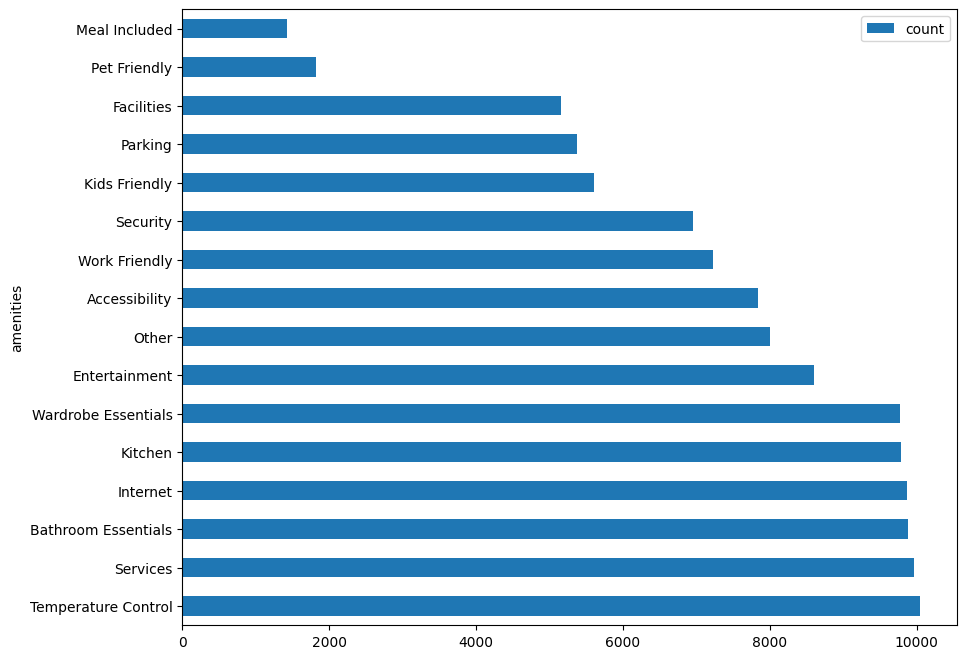

In [16]:
## Αυτο το ερώτημα θα απαντηθεί μόνο για τα στοιχεία του 2019 ##
## Βάση συζήτησης στο eclass                                  ##


##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')


# Data cleaning for amenities

def clean_amenities_string(amenities_entry):
    amenities_string = str(amenities_entry)
    # Remove leading and trailing brackets
    amenities_string = amenities_string.strip('{}"')
    # Split the string into a list using commas as the separator
    amenities_list = amenities_string.split(',')
    return amenities_list

amenities = all19['amenities'].apply(clean_amenities_string)

# Creating a list containing all of them

unique = amenities.explode('amenities').unique()

amenities = pd.DataFrame(unique)
amenities = amenities.rename(columns={'0': 'amenities'})
amenities['class'] = 'Other'
amenities

# Jim took this list, a large cup of coffee and a podcast and classified these
# amenities (he lost his sanity, plz give him credits)
amenities.to_csv('data/different.csv', index=False)


# Creating a dictionary based on Jim's clasification

amenities = pd.read_csv('data/different.csv')
classes = pd.read_csv('data/onlyclass.csv')

amenities['class'] = classes['class']
dictionary = dict(zip(amenities['0'], amenities['class']))

amenities.to_csv('data/ament-to-class.csv', index=False)

list_ament = all19[['id', 'amenities']]

def replace_amenities_string(amenities_entry):
    category_list = [dictionary[item] if item in dictionary else 'Other' for item in amenities_entry]
    return set(category_list)

# Replacing with the dictionary values
list_ament['amenities'] = list_ament['amenities'].apply(clean_amenities_string)
list_ament['amenities'] = list_ament['amenities'].apply(replace_amenities_string)

# Doing the counting
list_ament = list_ament.groupby('id').first()
list_ament = list_ament.explode('amenities')

list_ament = list_ament['amenities'].value_counts()
list_ament = pd.DataFrame(list_ament)

list_ament.plot(kind='barh', figsize=(10,8), rot=0)

f2.barh(list(list_ament.index), list(list_ament['count']))
f2.set_xlabel('Count')
f2.set_ylabel('Name')
f2.set_title('Top 5 Most Commented Neighbourhoods 2019')

plt.show()


#### 1.12 First, calculate the average price per neighborhood (using the “price” column, and keep only rooms that accommodate two guests so that comparisons are consistent).

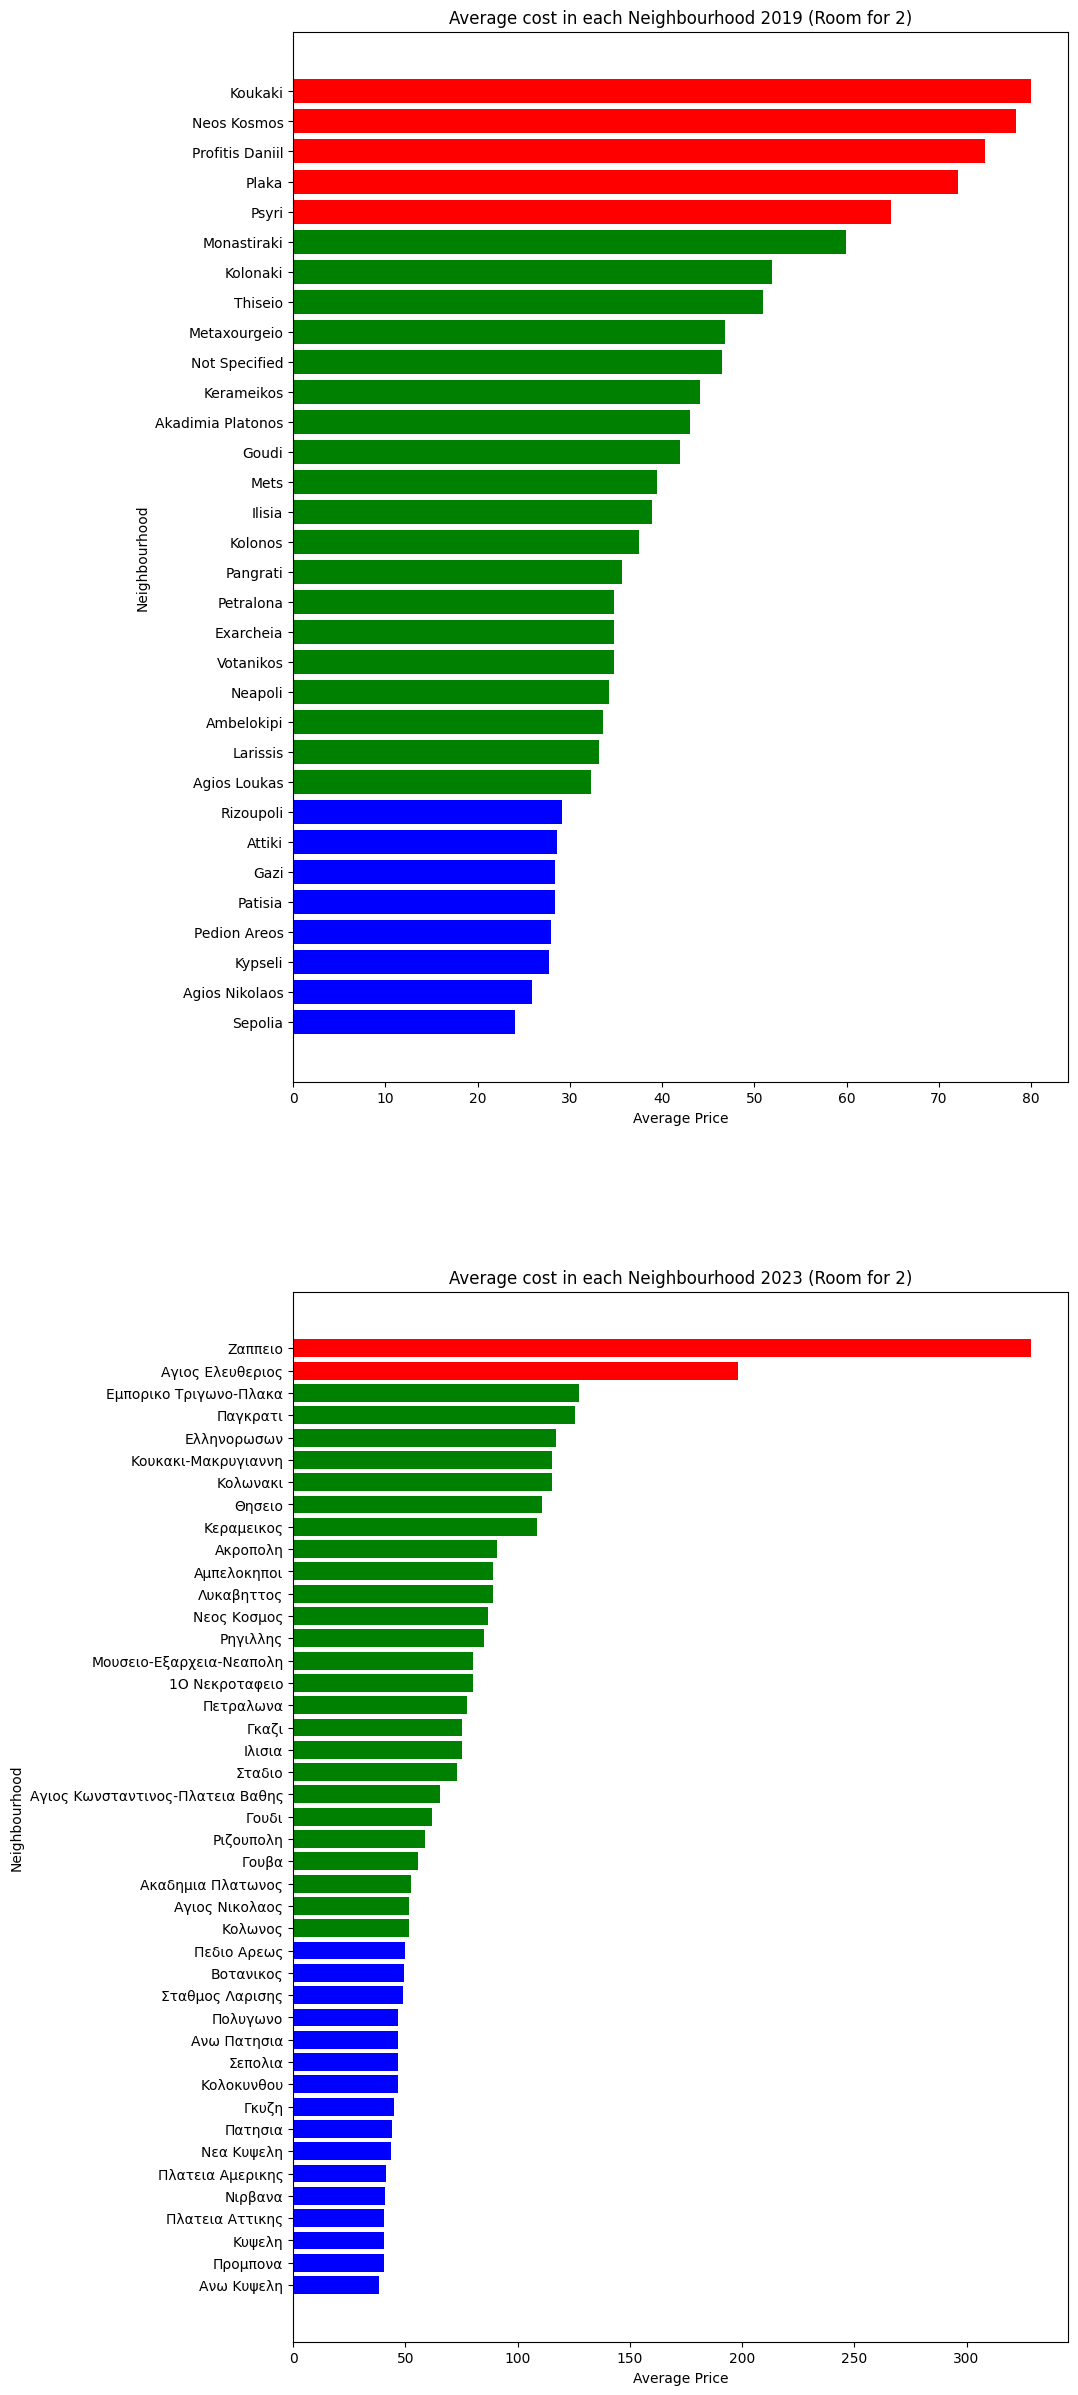

In [17]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(2,1, figsize=(10,30))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[all19['accommodates'] == 2]

acc19 = all19[['id','neighbourhood', 'price']].groupby('id').first()
acc19 = pd.DataFrame(acc19.groupby('neighbourhood')['price'].mean()).sort_values(by='price', ascending=True)

# Not needed
# acc19 = acc19.drop(acc19[acc19['price'] == 0.0].index)

# Conditions
conditions = [(acc19['price'] < 30),
             (acc19['price'] >= 30) & (acc19['price'] < 60),
             (acc19['price'] >= 60)
             ]
# Values
values = ['cheap', 'medium', 'expensive']
acc19['type'] = np.select(conditions, values, default='unknown')


# Set color list
color_list = list(acc19['type'].map({'expensive':'red', 'medium':'green', 'cheap':'blue'}))

# Note: Pending legend
f1.barh(list(acc19.index), list(acc19['price']), color=color_list)
f1.set_xlabel('Average Price')
f1.set_ylabel('Neighbourhood')
f1.set_title('Average cost in each Neighbourhood 2019 (Room for 2)')


##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23[all23['accommodates'] == 2]

acc23 = all23[['id','neighbourhood_cleansed', 'price']].groupby('id').first()
acc23 = pd.DataFrame(acc23.groupby('neighbourhood_cleansed')['price'].mean()).sort_values(by='price', ascending=True)


# Conditions
conditions = [(acc23['price'] < 50),
             (acc23['price'] >= 50) & (acc23['price'] < 150),
             (acc23['price'] >= 150)
             ]
# Values
values = ['cheap', 'medium', 'expensive']
acc23['type'] = np.select(conditions, values, default='unknown')

# Set color list
color_list = list(acc23['type'].map({'expensive':'red', 'medium':'green', 'cheap':'blue'}))

# Note: Pending legend
f2.barh(list(acc23.index), list(acc23['price']), color=color_list)
f2.set_xlabel('Average Price')
f2.set_ylabel('Neighbourhood')
f2.set_title('Average cost in each Neighbourhood 2023 (Room for 2)')
plt.show()

#### 1.13.1 What is the number of instantly bookable rooms per neighborhood?

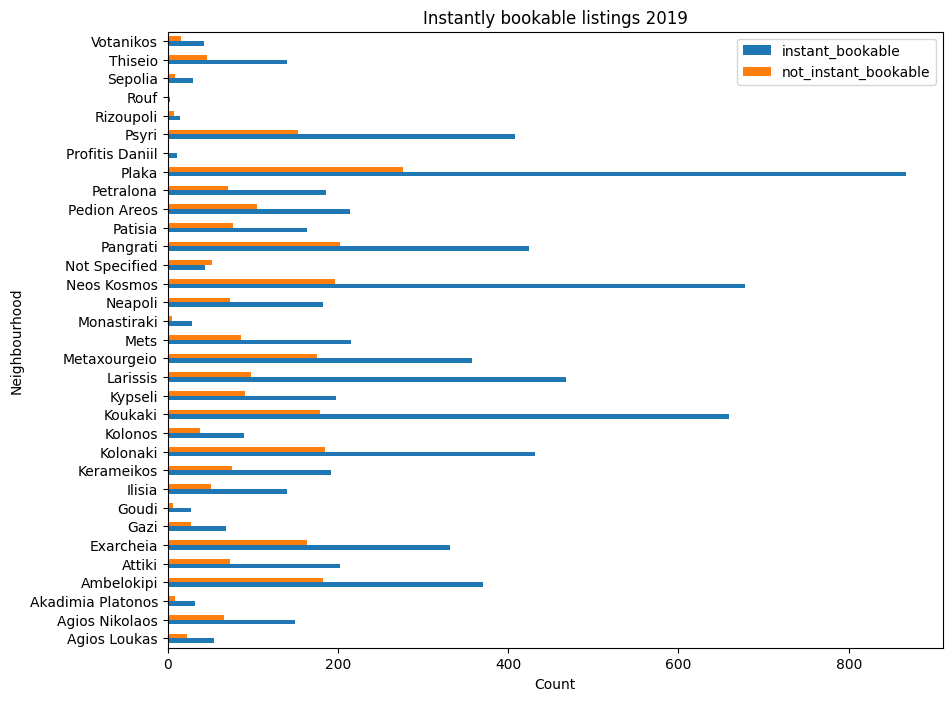

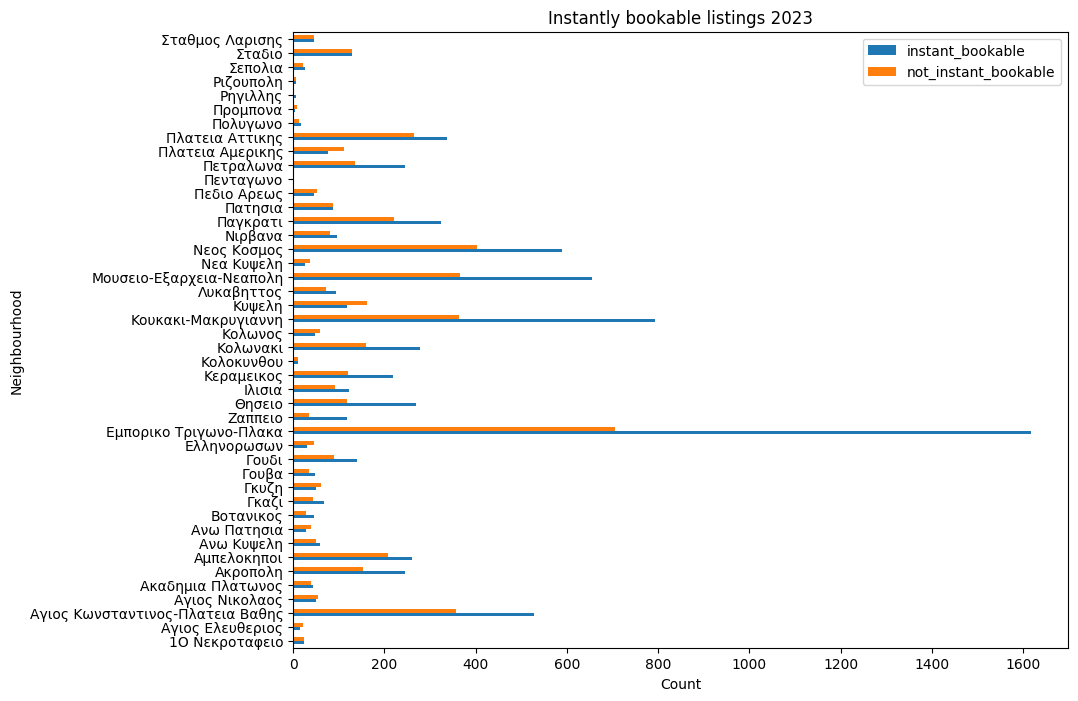

In [18]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19.dropna(subset=['instant_bookable'])

acc19 = all19[['id','neighbourhood', 'instant_bookable']].groupby('id').first()
yes = pd.DataFrame(acc19[acc19['instant_bookable'] == 't'].groupby('neighbourhood').size())
yes.rename(columns={0: 'instant_bookable'}, inplace=True)

no = pd.DataFrame(acc19[acc19['instant_bookable'] == 'f'].groupby('neighbourhood').size())
no.rename(columns={0: 'not_instant_bookable'}, inplace=True)

alldata = pd.merge(yes, no, left_index=True, right_index=True)

f2 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f2.set_xlabel('Count')
f2.set_ylabel('Neighbourhood')
f2.set_title('Instantly bookable listings 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23.dropna(subset=['instant_bookable'])

acc23 = all23[['id','neighbourhood_cleansed', 'instant_bookable']].groupby('id').first()
yes = pd.DataFrame(acc23[acc23['instant_bookable'] == 't'].groupby('neighbourhood_cleansed').size())
yes.rename(columns={0: 'instant_bookable'}, inplace=True)

no = pd.DataFrame(acc23[acc23['instant_bookable'] == 'f'].groupby('neighbourhood_cleansed').size())
no.rename(columns={0: 'not_instant_bookable'}, inplace=True)

alldata = pd.merge(yes, no, left_index=True, right_index=True)

f1 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f1.set_xlabel('Count')
f1.set_ylabel('Neighbourhood')
f1.set_title('Instantly bookable listings 2023')
plt.show()



#### 1.13.2 What is the average host response rate per neighborhood?

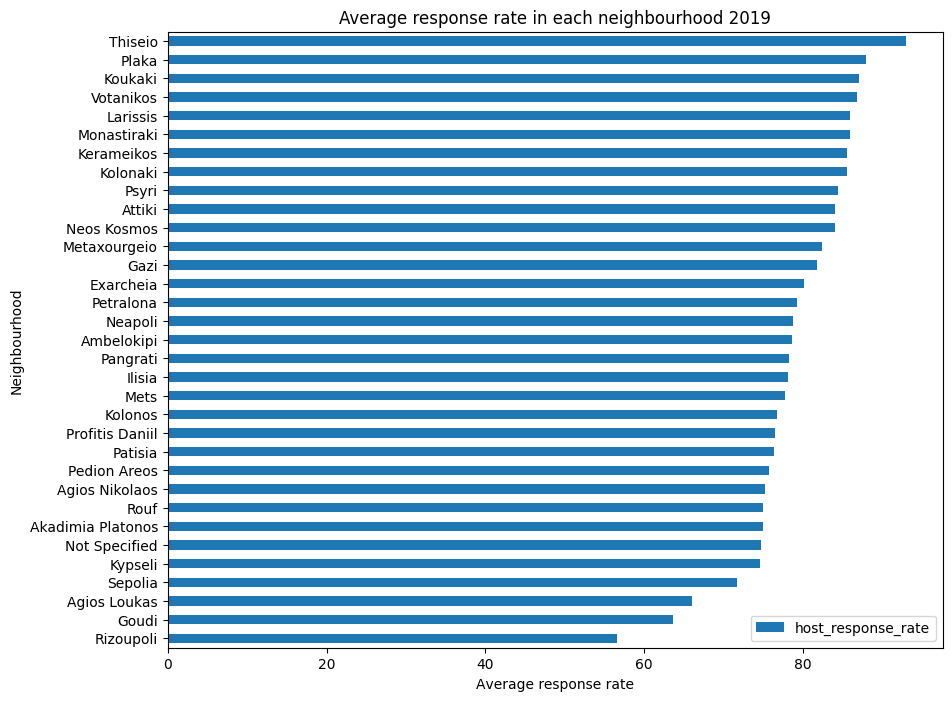

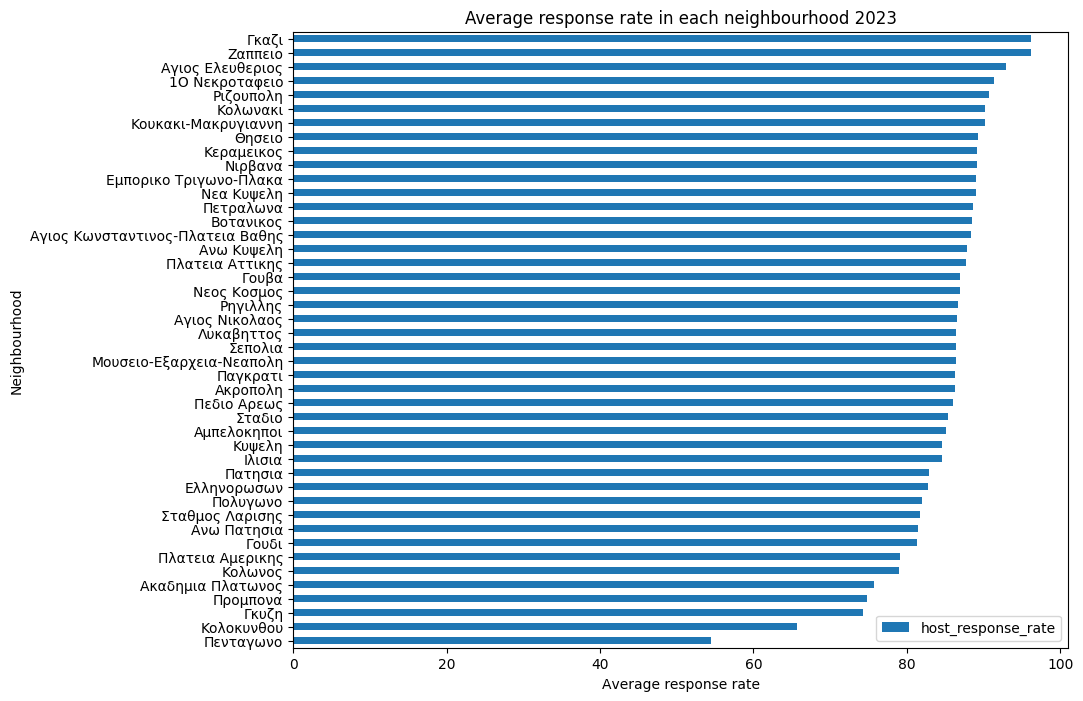

In [19]:
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
acc19 = all19[['id','neighbourhood', 'host_response_rate']].groupby('id').first()


def present_to_number(string):
  clean_str = re.sub(r'[^\d.]', '', str(string))
  if(clean_str == ''):
    return 0
  return float(clean_str)

acc19['host_response_rate'] = acc19['host_response_rate'].apply(present_to_number)


acc19 = acc19.dropna(subset=['host_response_rate'])

acc19

alldata = acc19.groupby('neighbourhood')['host_response_rate'].mean()
alldata = pd.DataFrame(alldata).sort_values(by='host_response_rate', ascending=True)

f2 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f2.set_xlabel('Αverage response rate')
f2.set_ylabel('Neighbourhood')
f2.set_title('Average response rate in each neighbourhood 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')


acc23 = all23[['id','neighbourhood_cleansed', 'host_response_rate']].groupby('id').first()

acc23['host_response_rate'] = acc23['host_response_rate'].apply(present_to_number)

acc23 = acc23.dropna(subset=['host_response_rate'])


alldata = acc23.groupby('neighbourhood_cleansed')['host_response_rate'].mean()
alldata = pd.DataFrame(alldata).sort_values(by='host_response_rate', ascending=True)

f1 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f1.set_xlabel('Αverage response rate')
f1.set_ylabel('Neighbourhood')
f1.set_title('Average response rate in each neighbourhood 2023')
plt.show()

#### 1.13.3 How many hosts per neighborhood are verified and how many are not?

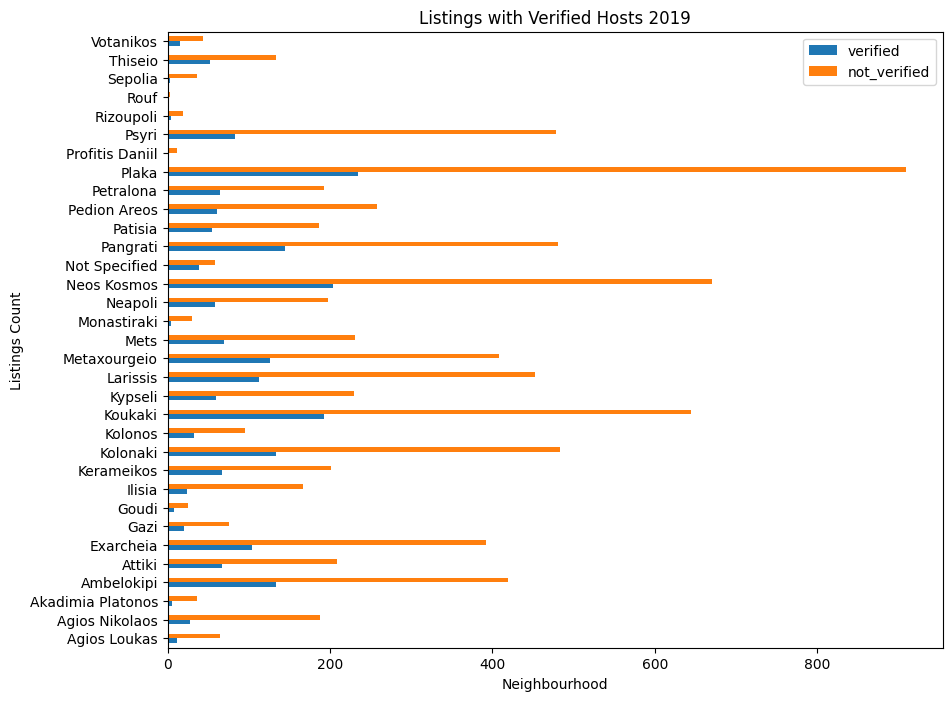

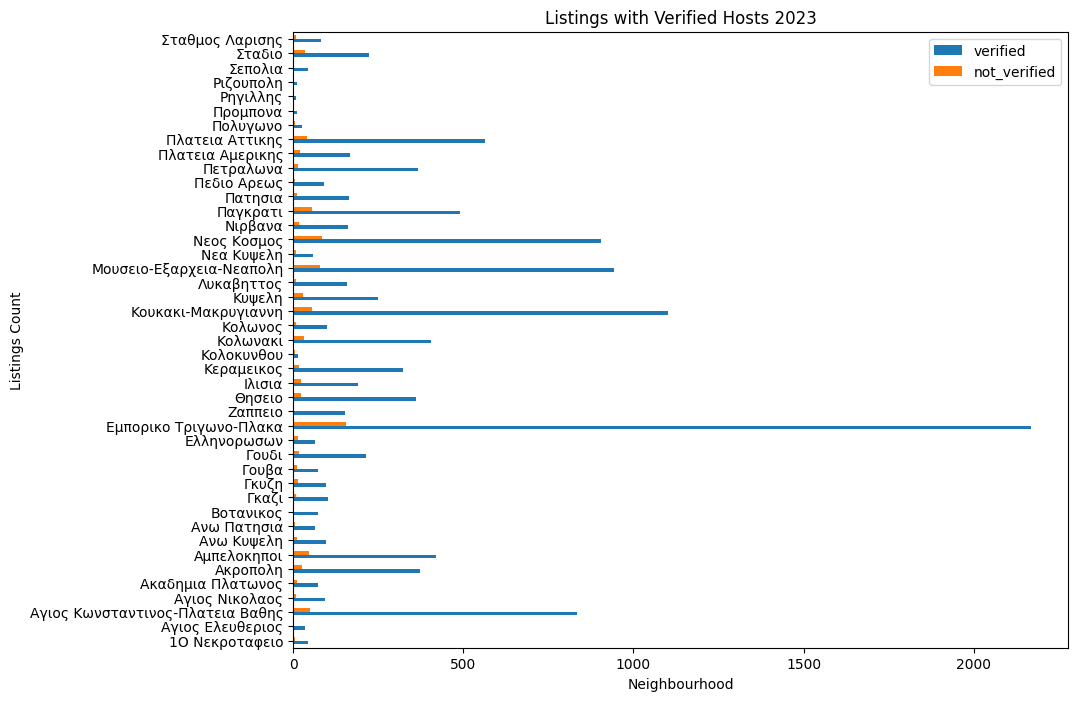

In [20]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19.dropna(subset=['host_identity_verified'])

acc19 = all19[['id','neighbourhood', 'host_identity_verified']].groupby('id').first()
yes = pd.DataFrame(acc19[acc19['host_identity_verified'] == 't'].groupby('neighbourhood').size())
yes.rename(columns={0: 'verified'}, inplace=True)

no = pd.DataFrame(acc19[acc19['host_identity_verified'] == 'f'].groupby('neighbourhood').size())
no.rename(columns={0: 'not_verified'}, inplace=True)

alldata = pd.merge(yes, no, left_index=True, right_index=True)

f2 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f2.set_xlabel('Neighbourhood')
f2.set_ylabel('Listings Count')
f2.set_title('Listings with Verified Hosts 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
all23 = all23.dropna(subset=['host_identity_verified'])

acc23 = all23[['id','neighbourhood_cleansed', 'host_identity_verified']].groupby('id').first()
yes = pd.DataFrame(acc23[acc23['host_identity_verified'] == 't'].groupby('neighbourhood_cleansed').size())
yes.rename(columns={0: 'verified'}, inplace=True)

no = pd.DataFrame(acc23[acc23['host_identity_verified'] == 'f'].groupby('neighbourhood_cleansed').size())
no.rename(columns={0: 'not_verified'}, inplace=True)

alldata = pd.merge(yes, no, left_index=True, right_index=True)

f1 = alldata.plot(kind='barh', figsize=(10,8), rot=0)

# Adding labels and title
f1.set_xlabel('Neighbourhood')
f1.set_ylabel('Listings Count')
f1.set_title('Listings with Verified Hosts 2023')
plt.show()



#### 1.14 Create a table with the information (host_id, num_host_listings) showing the 10 hosts with the most properties.

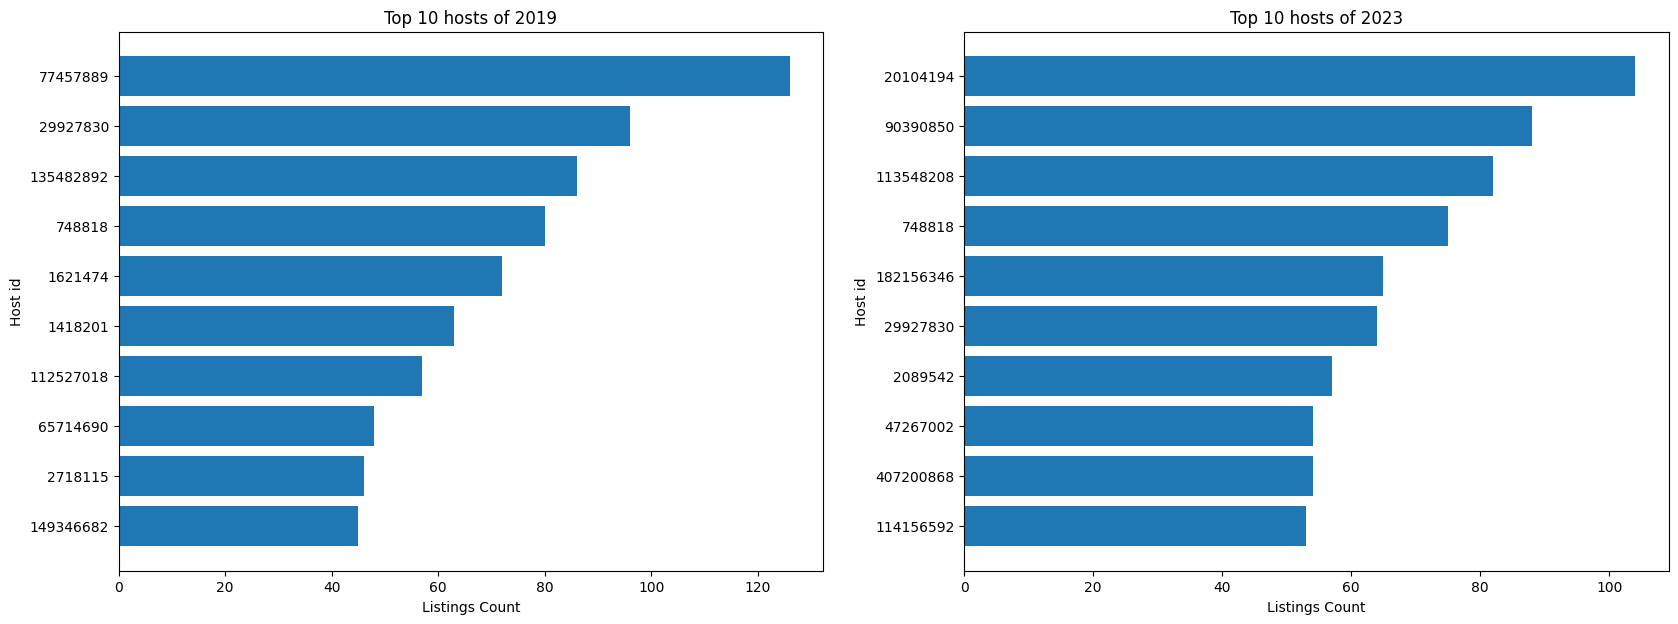

id
host_id       
77457889   126
29927830    96
135482892   86
748818      80
1621474     72
1418201     63
112527018   57
65714690    48
2718115     46
149346682   45

id
host_id       
20104194   104
90390850    88
113548208   82
748818      75
182156346   65
29927830    64
2089542     57
407200868   54
47267002    54
114156592   53

In [21]:
import pandas as pd
from matplotlib import pyplot as plt

fig, (f1, f2) = plt.subplots(1, 2, figsize=(20,7))

##############
#### 2019 ####
##############

all19 = pd.read_csv('data/train_2019.csv')
hosts19 = all19[['id', 'host_id']]

hosts19 = pd.DataFrame(hosts19.groupby('host_id')['id'].nunique())
hosts19 = hosts19.sort_values(by='id', ascending=False).head(10)
hosts19 = hosts19.sort_values(by='id', ascending=True)

f1.barh(list(hosts19.index.astype(str)), list(hosts19['id']))
f1.set_xlabel('Listings Count')
f1.set_ylabel('Host id')
f1.set_title('Top 10 hosts of 2019')

##############
#### 2023 ####
##############

all23 = pd.read_csv('data/train_2023.csv')
hosts23 = all23[['id', 'host_id']]

hosts23 = pd.DataFrame(hosts23.groupby('host_id')['id'].nunique())
hosts23 = hosts23.sort_values(by='id', ascending=False).head(10)
hosts23 = hosts23.sort_values(by='id', ascending=True)

f2.barh(list((hosts23.index.astype(int)).astype(str)), list(hosts23['id']))
f2.set_xlabel('Listings Count')
f2.set_ylabel('Host id')
f2.set_title('Top 10 hosts of 2023')

plt.show()

hosts19 = hosts19.sort_values(by='id', ascending=False)
display(hosts19)
hosts23 = hosts23.sort_values(by='id', ascending=False)
display(hosts23)

#### 1.15 Conclusion

Based on the above analysis, we see that Athens has seen a large increase in the number of properties available for short-term rental in every neighborhood.

Prices appear to have risen significantly, nearly doubling, while the popularity trends of certain neighborhoods (such as Koukaki, Plaka, and Neos Kosmos) have remained consistent between 2019 and 2023.
The relationships between expensive and inexpensive areas seem generally stable, with some shifts due to new neighborhoods entering the market.
More specifically, the areas Neos Kosmos, Koukaki, Plaka, and Monastiraki were among the most expensive in 2019, while in 2023 they fall into the moderate category.
Airbnb seems to have become a much more “mature” platform in Athens, with a sharp increase in verified hosts in 2023 compared to 2019.

## Question 2ο: Recommendation System


#### 2.1 Create the TF-IDF (Term Frequency – Inverse Document Frequency) matrix of unigrams and bigrams for the new column (use the stop_word parameter of TfidfVectorizer).

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#### 2019 ####

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[['id', 'name', 'description']].groupby('id').first()
all19 = all19.fillna('')

all19['text'] = all19['name'] + ' ' + all19['description']

results19 = all19[['text']]

def filter_english_letters(text):
    # Use a regular expression to find all words containing only English letters
    words_with_english_letters = re.findall(r'\b[a-zA-Z]+\b', text)
    # Join the words back into a single string
    return ' '.join(words_with_english_letters)

results19 = results19.copy()

# Apply the function to the DataFrame
results19['text'] = results19['text'].apply(filter_english_letters)

results19 = results19.transpose()

#### Unigram ####

# old (?u)\b\w\w+\b
tfidf_vectorizer = TfidfVectorizer(min_df=50, token_pattern=r"(?u)\b(?![\w\d]*\d)[\w']+\b", stop_words='english')
doc_vec = tfidf_vectorizer.fit_transform(results19.iloc[0])
unigram = pd.DataFrame(doc_vec.toarray().transpose(), index=tfidf_vectorizer.get_feature_names_out())

unigram.columns = results19.columns

display(unigram)

### Bigram ####
tfidf_vectorizer = TfidfVectorizer(min_df=100, token_pattern=r"(?u)\b(?![\w\d]*\d)[\w']+\b", ngram_range = (2, 2), stop_words='english')
doc_vec = tfidf_vectorizer.fit_transform(results19.iloc[0])
bigram = pd.DataFrame(doc_vec.toarray().transpose(), index=tfidf_vectorizer.get_feature_names_out())

bigram.columns = results19.columns

#### Print unigram
display(bigram)


id          10595     10988     10990     10993     10995     27262     \
able             0.0       0.0       0.0       0.0       0.0  0.000000   
absolutely       0.0       0.0       0.0       0.0       0.0  0.000000   
ac               0.0       0.0       0.0       0.0       0.0  0.000000   
academy          0.0       0.0       0.0       0.0       0.0  0.000000   
access           0.0       0.0       0.0       0.0       0.0  0.048655   
...              ...       ...       ...       ...       ...       ...   
year             0.0       0.0       0.0       0.0       0.0  0.000000   
years            0.0       0.0       0.0       0.0       0.0  0.000000   
young            0.0       0.0       0.0       0.0       0.0  0.000000   
zappeion         0.0       0.0       0.0       0.0       0.0  0.000000   
zeus             0.0       0.0       0.0       0.0       0.0  0.000000   

id          28186     31155     33704     38100     ...  33806394  33815673  \
able             0.0       0.0       0.0  0.000000  ...       0.0       0.0   
absolutely       0.0       0.0       0.0  0.000000  ...       0.0       0.0   
ac               0.0       0.0       0.0  0.000000  ...       0.0       0.0   
academy          0.0       0.0       0.0  0.000000  ...       0.0       0.0   
access           0.0       0.0       0.0  0.000000  ...       0.0       0.0   
...              ...       ...       ...       ...  ...       ...       ...   
year             0.0       0.0       0.0  0.000000  ...       0.0       0.0   
years            0.0       0.0       0.0  0.000000  ...       0.0       0.0   
young            0.0       0.0       0.0  0.000000  ...       0.0       0.0   
zappeion         0.0       0.0       0.0  0.160935  ...       0.0       0.0   
zeus             0.0       0.0       0.0  0.000000  ...       0.0       0.0   

id          33815687  33818689  33818761  33819692  33820145  33821757  \
able        0.000000  0.000000       0.0       0.0       0.0       0.0   
absolutely  0.000000  0.000000       0.0       0.0       0.0       0.0   
ac          0.000000  0.000000       0.0       0.0       0.0       0.0   
academy     0.000000  0.000000       0.0       0.0       0.0       0.0   
access      0.067737  0.060708       0.0       0.0       0.0       0.0   
...              ...       ...       ...       ...       ...       ...   
year        0.000000  0.000000       0.0       0.0       0.0       0.0   
years       0.000000  0.000000       0.0       0.0       0.0       0.0   
young       0.000000  0.000000       0.0       0.0       0.0       0.0   
zappeion    0.000000  0.000000       0.0       0.0       0.0       0.0   
zeus        0.000000  0.000000       0.0       0.0       0.0       0.0   

id          33821833  33822443  
able             0.0       0.0  
absolutely       0.0       0.0  
ac               0.0       0.0  
academy          0.0       0.0  
access           0.0       0.0  
...              ...       ...  
year             0.0       0.0  
years            0.0       0.0  
young            0.0       0.0  
zappeion         0.0       0.0  
zeus             0.0       0.0  

[1392 rows x 10249 columns]

id                 10595     10988     10990     10993     10995     27262     \
access airport      0.00000    0.0000  0.000000  0.000000  0.000000  0.176841   
access apartment    0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
access balcony      0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
access entire       0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
access rooms        0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
...                     ...       ...       ...       ...       ...       ...   
website hidden      0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
wi fi               0.37756    0.3837  0.355823  0.486437  0.376889  0.110146   
wifi internet       0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
wireless internet   0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   
wooden floor        0.00000    0.0000  0.000000  0.000000  0.000000  0.000000   

id                 28186     31155     33704     38100     ...  33806394  \
access airport          0.0       0.0       0.0       0.0  ...       0.0   
access apartment        0.0       0.0       0.0       0.0  ...       0.0   
access balcony          0.0       0.0       0.0       0.0  ...       0.0   
access entire           0.0       0.0       0.0       0.0  ...       0.0   
access rooms            0.0       0.0       0.0       0.0  ...       0.0   
...                     ...       ...       ...       ...  ...       ...   
website hidden          0.0       0.0       0.0       0.0  ...       0.0   
wi fi                   0.0       0.0       0.0       0.0  ...       0.0   
wifi internet           0.0       0.0       0.0       0.0  ...       0.0   
wireless internet       0.0       0.0       0.0       0.0  ...       0.0   
wooden floor            0.0       0.0       0.0       0.0  ...       0.0   

id                 33815673  33815687  33818689  33818761  33819692  33820145  \
access airport          0.0       0.0       0.0       0.0       0.0       0.0   
access apartment        0.0       0.0       0.0       0.0       0.0       0.0   
access balcony          0.0       0.0       0.0       0.0       0.0       0.0   
access entire           0.0       0.0       0.0       0.0       0.0       0.0   
access rooms            0.0       0.0       0.0       0.0       0.0       0.0   
...                     ...       ...       ...       ...       ...       ...   
website hidden          0.0       0.0       0.0       0.0       0.0       0.0   
wi fi                   0.0       0.0       0.0       0.0       0.0       0.0   
wifi internet           0.0       0.0       0.0       0.0       0.0       0.0   
wireless internet       0.0       0.0       0.0       0.0       0.0       0.0   
wooden floor            0.0       0.0       0.0       0.0       0.0       0.0   

id                 33821757  33821833  33822443  
access airport     0.000000       0.0       0.0  
access apartment   0.000000       0.0       0.0  
access balcony     0.000000       0.0       0.0  
access entire      0.000000       0.0       0.0  
access rooms       0.000000       0.0       0.0  
...                     ...       ...       ...  
website hidden     0.000000       0.0       0.0  
wi fi              0.178819       0.0       0.0  
wifi internet      0.000000       0.0       0.0  
wireless internet  0.000000       0.0       0.0  
wooden floor       0.000000       0.0       0.0  

[571 rows x 10249 columns]

#### 2.2 Cosine Similarity: This metric calculates the similarity between two vectors x, y by using the angle between them (when the angle is 0, x and y are identical, apart from their magnitude).

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk


#### 2019 ####

## Unigram from previous task ##
all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[['id', 'name', 'description']].groupby('id').first()
all19 = all19.fillna('')

all19['text'] = all19['name'] + ' ' + all19['description']

results19 = all19[['text']]

def filter_english_letters(text):
    # Use a regular expression to find all words containing only English letters
    words_with_english_letters = re.findall(r'\b[a-zA-Z]+\b', text)
    # Join the words back into a single string
    return ' '.join(words_with_english_letters)

results19 = results19.copy()

# Apply the function to the DataFrame
results19['text'] = results19['text'].apply(filter_english_letters)

results19 = results19.transpose()
tfidf_vectorizer = TfidfVectorizer(min_df=50, token_pattern=r"(?u)\b(?![\w\d]*\d)[\w']+\b", stop_words='english')
doc_vec = tfidf_vectorizer.fit_transform(results19.iloc[0])
unigram = pd.DataFrame(doc_vec.toarray().transpose(), index=tfidf_vectorizer.get_feature_names_out())

unigram.columns = results19.columns



######## Added code from here ########

unigram = unigram.transpose()
array = cosine_similarity(unigram)


array = pd.DataFrame(array)
array.columns = results19.columns
array.index = array.columns

mask = np.tril(np.ones(array.shape, dtype=bool), k=-1)

lower_triangle = array.where(mask)

# Convert the lower triangle DataFrame to a 1D Series
flattened_series = lower_triangle.stack()

# Sort the Series in descending order
sorted_series = flattened_series.sort_values(ascending=False)

# Get the top 100 indices
top_100_indices = sorted_series.head(100).index

# # Sort the Series in descending order
# sorted_series = flattened_series.sort_values(ascending=False)

most_identical = {}

# print("Top 100 values:")
for i in range(100):
    most_identical[i] = top_100_indices[i]

# print(all19.loc[21618310, 'description'])
# print(all19.loc[21618154, 'description'])

# Print the dictionary
# most_identical



#### 2.3 Prediction: Create a function that takes as input an id and an integer N, and returns the N most similar properties.

In [24]:
import pandas as pd

def recommend(column_name, N):
  # Find the top N largest instances in the specified column
  scan_table = array.drop(column_name)

  top_N_instances = scan_table.nlargest(N, column_name)

  # Get the indexes of the top N instances
  top_N_indexes = top_N_instances.index

  print(f"Recommending {N} listings similar to '{all19.loc[column_name, 'name']}':")
  print("---------------------------------------------------------------------------")

  for index in top_N_indexes:
    print(f"Recommended: '{all19.loc[index, 'name']}'")
    print(f"Description: '{all19.loc[index, 'description']}'")
    print(f"(score:'{scan_table.loc[index, column_name]}')\n")

recommend(32730045, 5)


Recommending 5 listings similar to 'Cherry Room 4':
---------------------------------------------------------------------------
Recommended: 'Cherry Room 3'
Description: 'A large Lux apartment of 110 sq.m., sunny, airy and renovated, new equipment on the 1st floor of a typical urban building of architectural importance, constructed in the ‘90’s - located in the very center of Athens, easily reachable with various means of public transportation (bus, train, electrical bus). In a pedestrian street with a lots of cafe and resturant. Four spacious independent bedrooms with wooden floor, a big and cozy living room -  kitchen, fully equipped and 2 renovated bathrooms. The apartment is located in the center of Athens near the National Archaeological Museum. The flat is fully renovated in December 2017 and is located in a beautiful building on Agiou Meletiou street. It consists four (4) bright and airy rooms, 4 out of 4 have a balcony. It has new sinks & toilets, furniture,double beds, mattres

#### 2.4 Words that tend to appear frequently together (collocation). Use the BigramCollocationFinder to find 10 words that tend to appear together often.

In [25]:
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.collocations import *
from nltk.corpus import stopwords
import re
import spacy
from nltk.tokenize import RegexpTokenizer

#### 2019 ####

all19 = pd.read_csv('data/train_2019.csv')
all19 = all19[['id', 'name', 'description']].groupby('id').first()
all19 = all19.fillna('')

all19['text'] = all19['name'] + ' ' + all19['description']

results19 = all19[['text']]

def filter_english_letters(text):
    # Use a regular expression to find all words containing only English letters
    words_with_english_letters = re.findall(r'\b[a-zA-Z]+\b', text)
    # Join the words back into a single string
    return ' '.join(words_with_english_letters)

results19 = results19.copy()

# Apply the function to the DataFrame
results19['text'] = results19['text'].apply(filter_english_letters)

# Extracting words from each text

tokenizer = RegexpTokenizer(r"(?u)\b(?![\w\d]*\d)[\w']+\b")
# Tokenizer Texts
dirty_text_tokens = [tokenizer.tokenize(token.lower().strip()) for token in results19['text']]
# Initialize master list to populate
master_text_tokens = []
# For each dirty text, get list of clean tokens and append to master_text_tokens
for text in dirty_text_tokens:
    clean_text_tokens = []

    for word in text:
        if ((word not in stopwords.words('english'))):
            clean_text_tokens.append(word)

    master_text_tokens.append(clean_text_tokens)

bigram_measures = nltk.collocations.BigramAssocMeasures()

full_list = master_text_tokens[0]
for sub_list in master_text_tokens[1:]:
    full_list.extend(sub_list)

# Bigrams
finder = BigramCollocationFinder.from_words(
   full_list)

# only bigrams that appear 60+ times
finder.apply_freq_filter(60)

# return the 10 n-grams with the highest PMI
# print (finder.nbest(bigram_measures.likelihood_ratio, 10))
print("The 10 most collocated phrases that appear 60+ times")
for i , score in zip(range(10), finder.score_ngrams(bigram_measures.pmi)):
  print(score)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The 10 most collocated phrases that appear 60+ times
(('fokionos', 'negri'), 12.83366450772671)
(('herodes', 'atticus'), 12.666717206084293)
(('coco', 'mat'), 12.544202529063911)
(('olive', 'oil'), 12.515044178502887)
(('mobile', 'application'), 12.349999585133466)
(('eleftherios', 'venizelos'), 12.269595583975054)
(('atm', 'cash'), 12.249464027380268)
(('value', 'money'), 12.16790006694228)
(('importance', 'constructed'), 12.112193823516835)
(('pedion', 'areos'), 12.089484521525165)
